In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pylab import rcParams
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from numpy.random import seed
seed(1)
tf.compat.v1.set_random_seed(2)
SEED = 123 #used to help randomly select the data points
DATA_SPLIT_PCT = 0.2
rcParams['figure.figsize'] = 8, 6
LABELS = ["Discharge","Hospitalization"]

In [23]:
df3 = pd.read_csv('base.csv')
df3.set_index('Patient ID', inplace = True)

In [24]:
df_train, df_test = train_test_split(df3,test_size = DATA_SPLIT_PCT, random_state = SEED)
df_train, df_valid = train_test_split(df_train,test_size = DATA_SPLIT_PCT, random_state = SEED)

df_train_0 = df_train.loc[df3['unit'] == 0]
df_train_1 = df_train.loc[df3['unit'] == 1]
df_train_0_x = df_train_0.drop(['unit'], axis=1)
df_train_1_x = df_train_1.drop(['unit'], axis=1)

df_valid_0 = df_valid.loc[df3['unit'] == 0]
df_valid_1 = df_valid.loc[df3['unit'] == 1]
df_valid_0_x = df_valid_0.drop(['unit'], axis=1)
df_valid_1_x = df_valid_1.drop(['unit'], axis=1)

df_test_0 = df_test.loc[df3['unit'] == 0]
df_test_1 = df_test.loc[df3['unit'] == 1]
df_test_0_x = df_test_0.drop(['unit'], axis=1)
df_test_1_x = df_test_1.drop(['unit'], axis=1)

In [25]:
nb_epoch = 200
batch_size = 128
input_dim = df_train_0_x.shape[1] #num of predictor variables, 
encoding_dim = 32
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-3

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation="relu")(decoder)
decoder = Dense(input_dim, activation="linear")(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 17)                561       
Total params: 2,481
Trainable params: 2,481
Non-trainable params: 0
____________________________________________________

In [26]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_classifier.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(df_train_0_x, df_train_0_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(df_valid_0_x, df_valid_0_x),
                    verbose=1,
                    callbacks=[cp, tb]).history

Epoch 1/200
1/3 [=========>....................] - ETA: 0s - loss: 10.9943 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\vinym\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
3/3 [==============================] - 4s 1s/step - loss: 10.0017 - accuracy: 0.0000e+00 - val_loss: 9.3155 - val_accuracy: 0.0000e+00
Epoch 2/200
3/3 [==============================] - 0s 63ms/step - loss: 9.2981 - accuracy: 0.0033 - val_loss: 8.7401 - val_accuracy: 0.0256
Epoch 3/200
3/3 [==============================] - 0s 125ms/step - loss: 8.7268 - accuracy: 0.0464 - val_loss: 8.2796 - val_accuracy: 0.1154
Epoch 4/200
3/3 [==============================] - 0s 88ms/step - loss: 8.2727 - accuracy: 0.1854 - val_loss: 7.8853 - val_accuracy: 0.4103
Epoch 5/200
3/3 [==============================

3/3 [==============================] - 0s 92ms/step - loss: 0.5255 - accuracy: 0.9702 - val_loss: 0.6014 - val_accuracy: 0.9487
Epoch 54/200
3/3 [==============================] - 1s 169ms/step - loss: 0.5210 - accuracy: 0.9702 - val_loss: 0.5950 - val_accuracy: 0.9487
Epoch 55/200
3/3 [==============================] - 0s 139ms/step - loss: 0.5159 - accuracy: 0.9702 - val_loss: 0.5883 - val_accuracy: 0.9487
Epoch 56/200
3/3 [==============================] - 0s 89ms/step - loss: 0.5106 - accuracy: 0.9702 - val_loss: 0.5835 - val_accuracy: 0.9487
Epoch 57/200
3/3 [==============================] - 0s 97ms/step - loss: 0.5059 - accuracy: 0.9702 - val_loss: 0.5787 - val_accuracy: 0.9487
Epoch 58/200
3/3 [==============================] - 0s 85ms/step - loss: 0.5011 - accuracy: 0.9702 - val_loss: 0.5752 - val_accuracy: 0.9487
Epoch 59/200
3/3 [==============================] - 0s 74ms/step - loss: 0.4961 - accuracy: 0.9702 - val_loss: 0.5705 - val_accuracy: 0.9487
Epoch 60/200
3/3 [======

Epoch 111/200
3/3 [==============================] - 0s 106ms/step - loss: 0.2662 - accuracy: 0.9868 - val_loss: 0.3024 - val_accuracy: 0.9744
Epoch 112/200
3/3 [==============================] - 0s 78ms/step - loss: 0.2630 - accuracy: 0.9868 - val_loss: 0.3001 - val_accuracy: 0.9744
Epoch 113/200
3/3 [==============================] - 0s 111ms/step - loss: 0.2606 - accuracy: 0.9868 - val_loss: 0.2978 - val_accuracy: 0.9744
Epoch 114/200
3/3 [==============================] - 0s 154ms/step - loss: 0.2584 - accuracy: 0.9868 - val_loss: 0.2947 - val_accuracy: 0.9744
Epoch 115/200
3/3 [==============================] - 0s 100ms/step - loss: 0.2556 - accuracy: 0.9868 - val_loss: 0.2930 - val_accuracy: 0.9744
Epoch 116/200
3/3 [==============================] - 0s 150ms/step - loss: 0.2530 - accuracy: 0.9868 - val_loss: 0.2920 - val_accuracy: 0.9744
Epoch 117/200
3/3 [==============================] - 0s 81ms/step - loss: 0.2508 - accuracy: 0.9868 - val_loss: 0.2894 - val_accuracy: 0.9744
E

3/3 [==============================] - 0s 85ms/step - loss: 0.1627 - accuracy: 0.9934 - val_loss: 0.1986 - val_accuracy: 0.9744
Epoch 169/200
3/3 [==============================] - 0s 123ms/step - loss: 0.1614 - accuracy: 0.9934 - val_loss: 0.1970 - val_accuracy: 0.9744
Epoch 170/200
3/3 [==============================] - 0s 135ms/step - loss: 0.1601 - accuracy: 0.9934 - val_loss: 0.1960 - val_accuracy: 0.9744
Epoch 171/200
3/3 [==============================] - 0s 73ms/step - loss: 0.1587 - accuracy: 0.9934 - val_loss: 0.1946 - val_accuracy: 0.9744
Epoch 172/200
3/3 [==============================] - 0s 79ms/step - loss: 0.1578 - accuracy: 0.9934 - val_loss: 0.1939 - val_accuracy: 0.9744
Epoch 173/200
3/3 [==============================] - 0s 111ms/step - loss: 0.1563 - accuracy: 0.9934 - val_loss: 0.1926 - val_accuracy: 0.9744
Epoch 174/200
3/3 [==============================] - 0s 134ms/step - loss: 0.1552 - accuracy: 0.9934 - val_loss: 0.1915 - val_accuracy: 0.9744
Epoch 175/200
3/

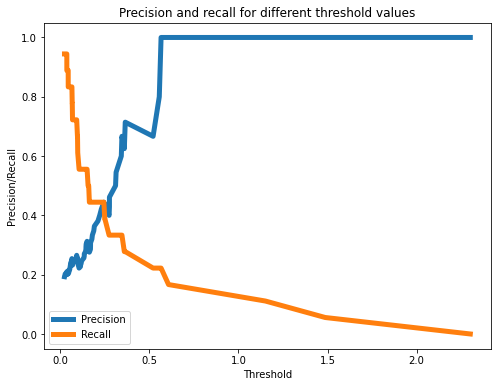

In [27]:
df_valid_x = df_valid.drop(['unit'],axis=1)
valid_x_predictions = autoencoder.predict(df_valid_x)
mse = np.mean(np.power(df_valid_x - valid_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_valid['unit']})
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

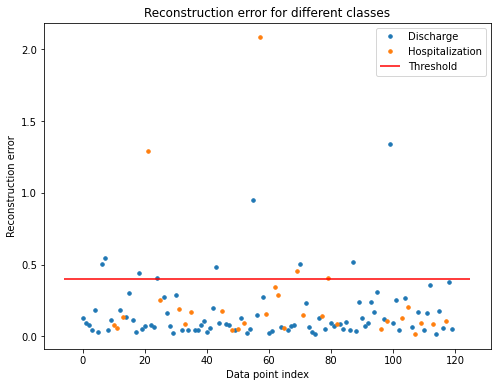

In [28]:
df_test_x = df_test.drop(columns = ['unit'])

test_x_predictions = autoencoder.predict(df_test_x)
mse = np.mean(np.power(df_test_x - test_x_predictions, 2), axis=1)
error_df_test = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': df_test['unit']})
error_df_test = error_df_test.reset_index()
threshold_fixed = 0.4
groups = error_df_test.groupby('True_class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Hospitalization" if name == 1 else "Discharge")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

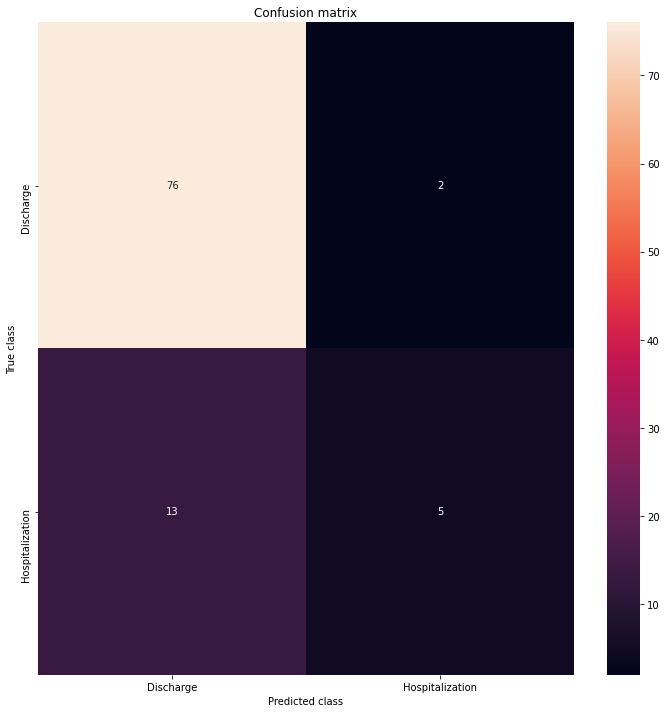

In [29]:
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

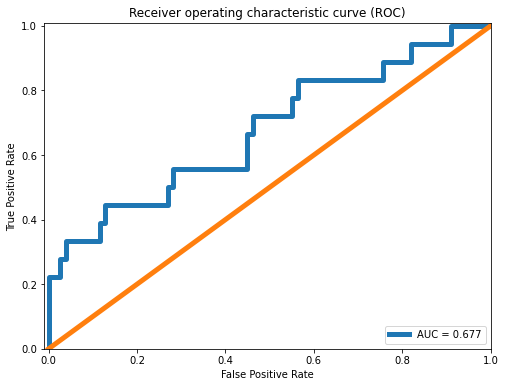

In [30]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)
plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)
plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()